In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')


In [3]:
# Select numerical columns
numerical_df = customer_df.select_dtypes(include='number')

# Select categorical columns
categorical_df = customer_df.select_dtypes(include='object')
print("Numerical Data:")
print(numerical_df.head())

print("\nCategorical Data:")
print(categorical_df.head())


Numerical Data:
   Customer Lifetime Value  Income  Monthly Premium Auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   Months Since Last Claim  Months Since Policy Inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   Number of Open Complaints  Number of Policies  Total Claim Amount  
0                          0                   1          384.811147  
1                          0                   8         1131.464935  
2                          0               

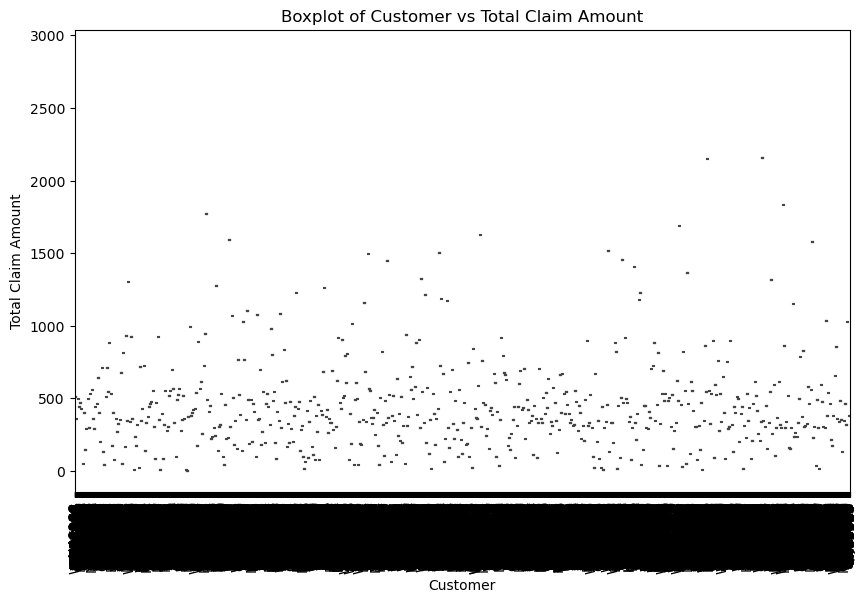

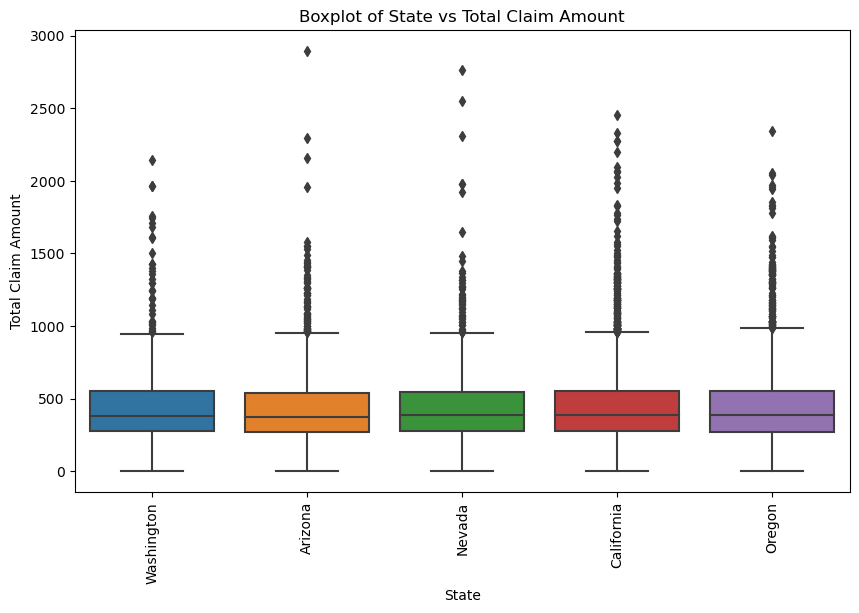

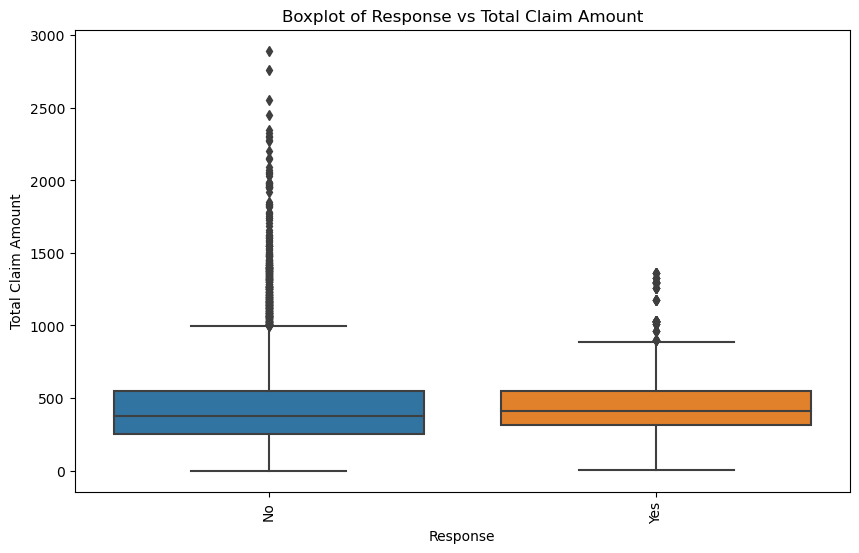

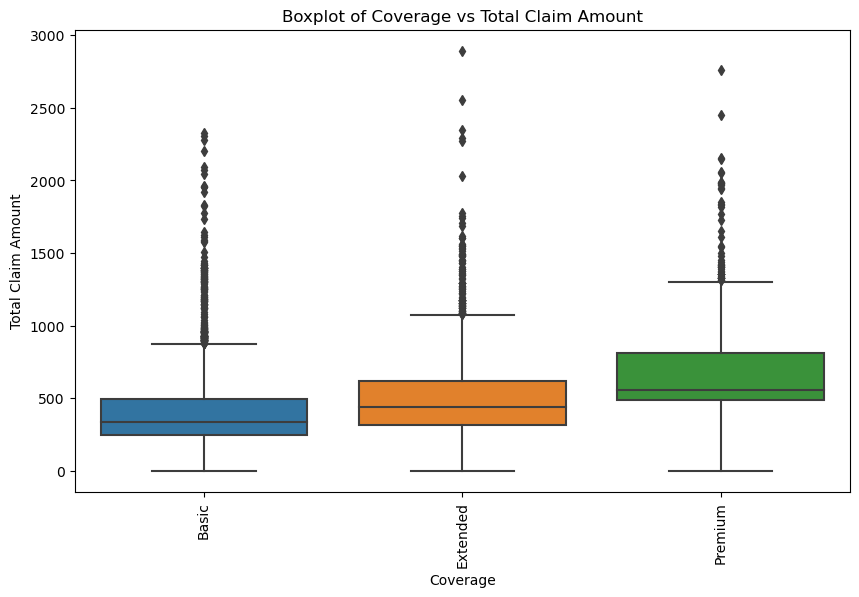

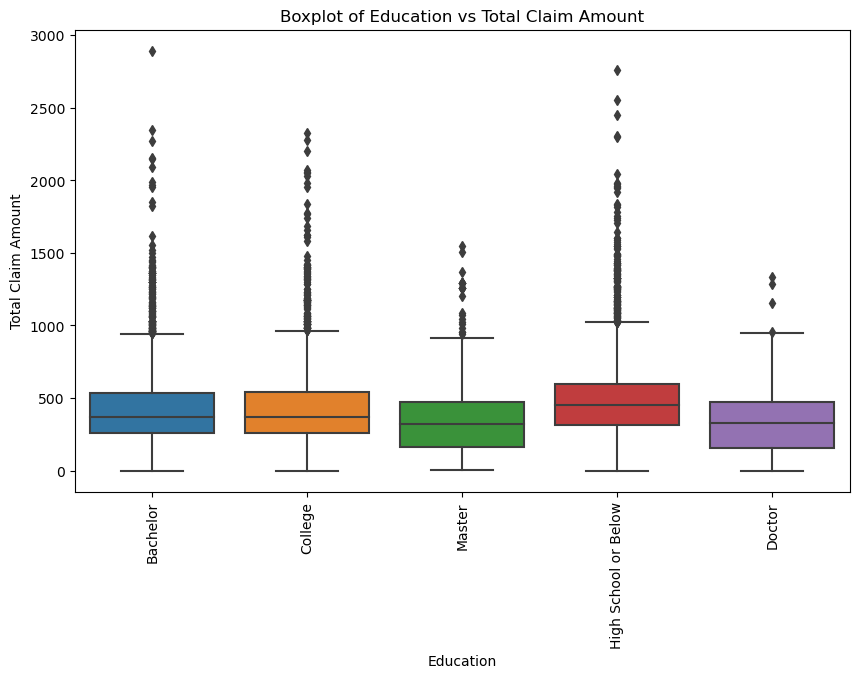

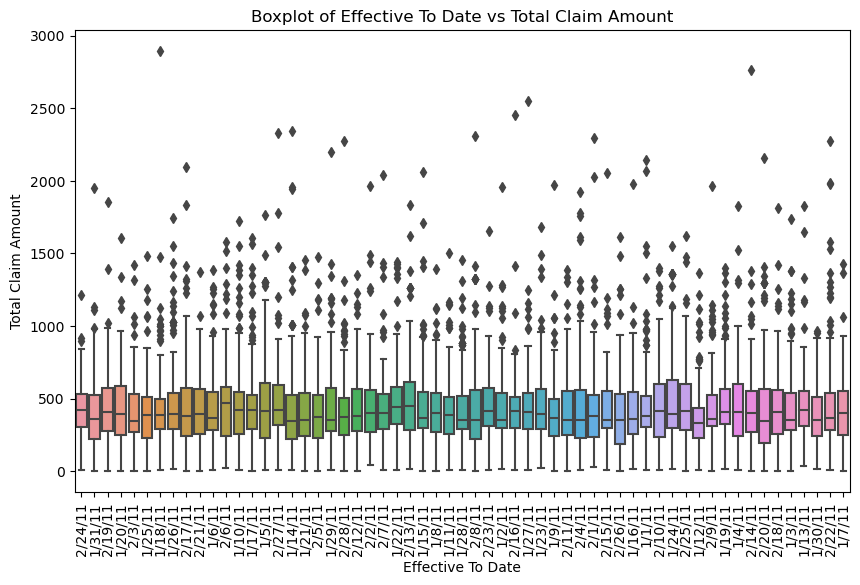

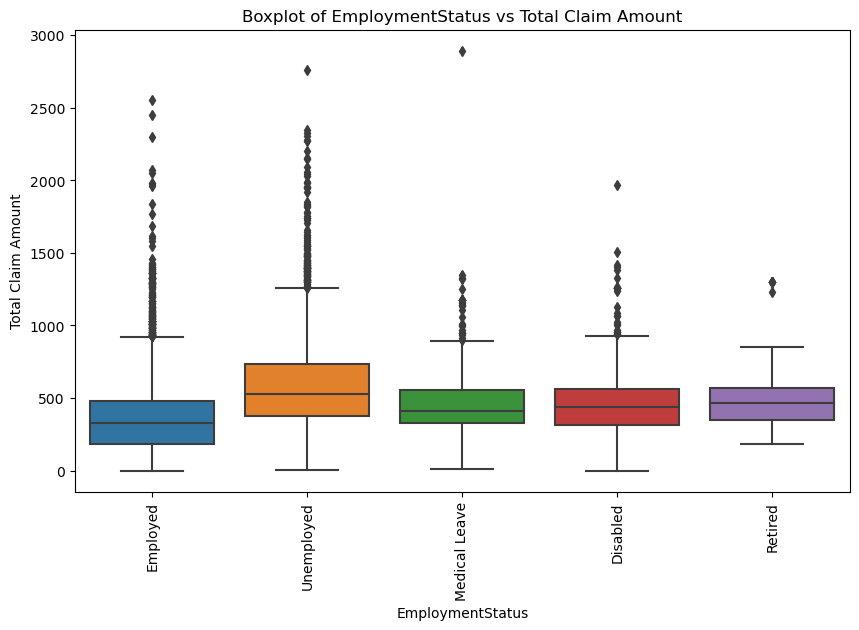

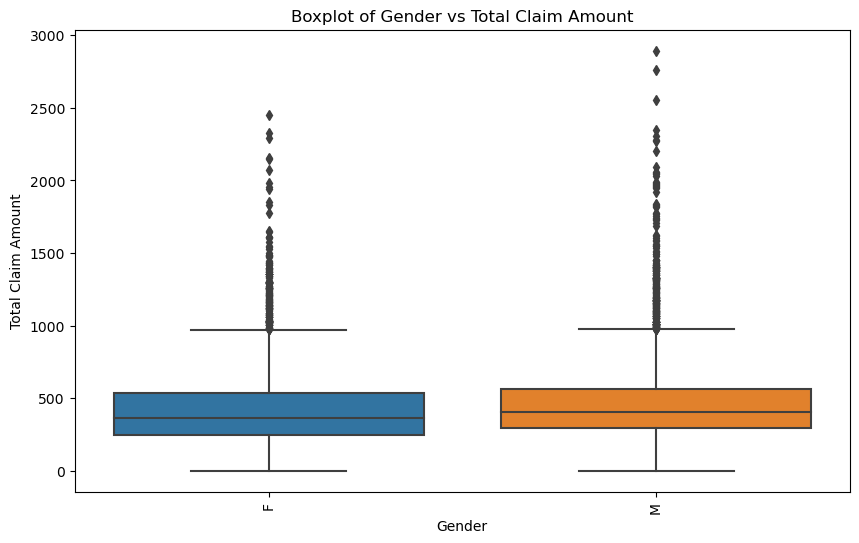

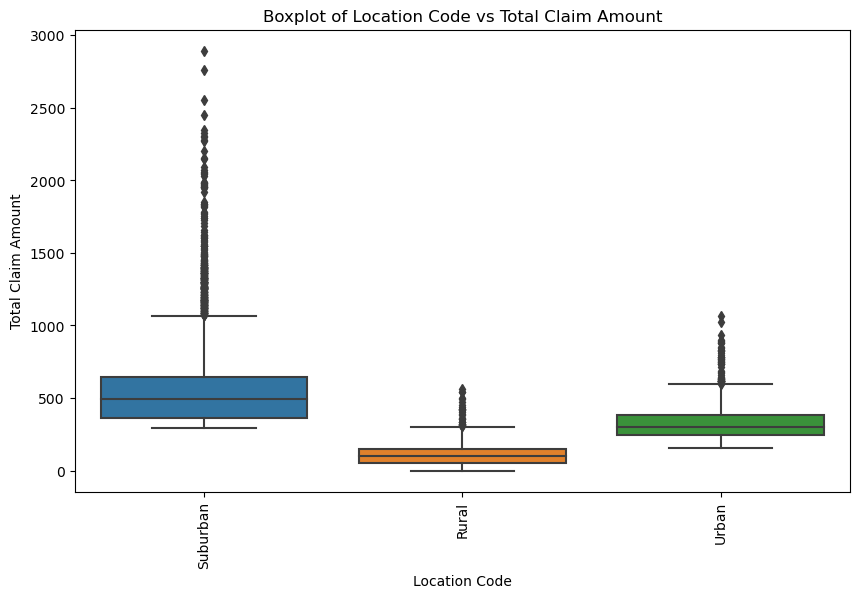

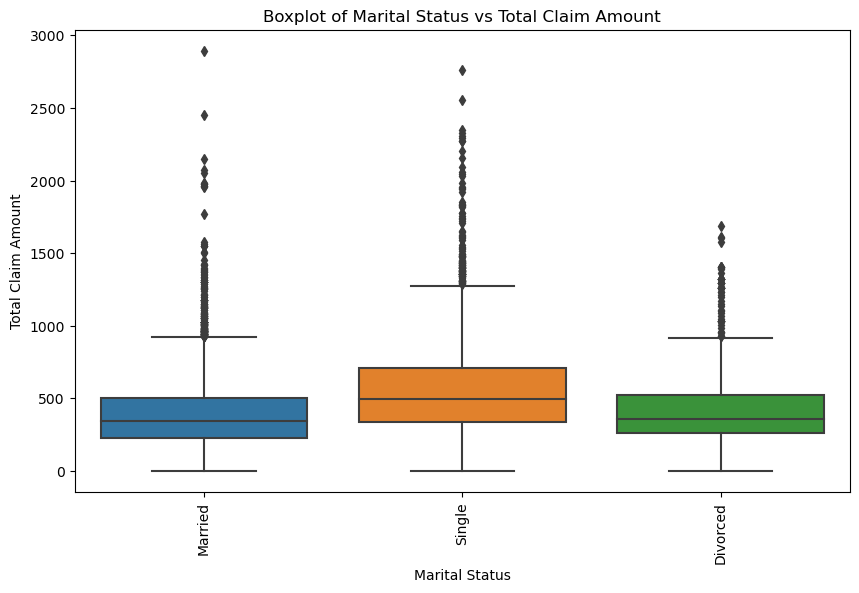

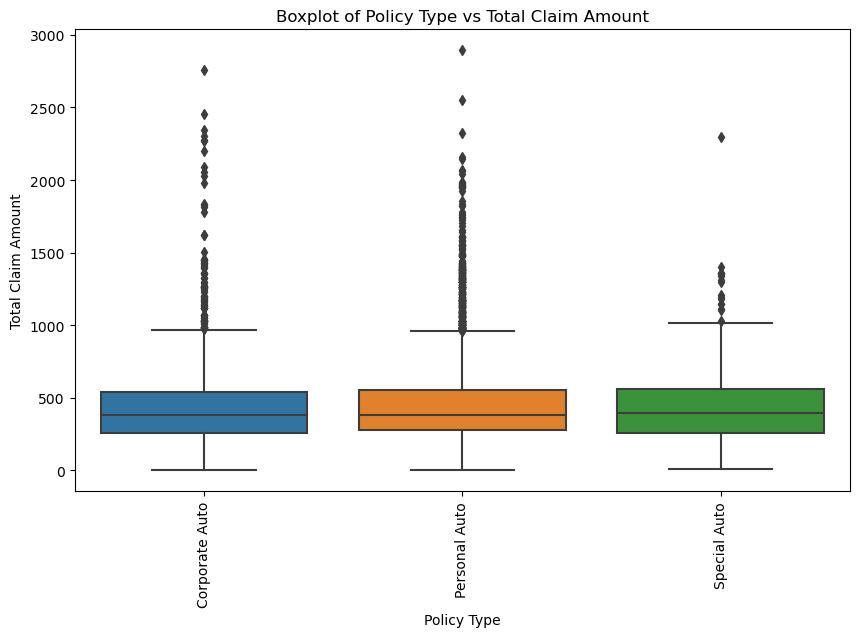

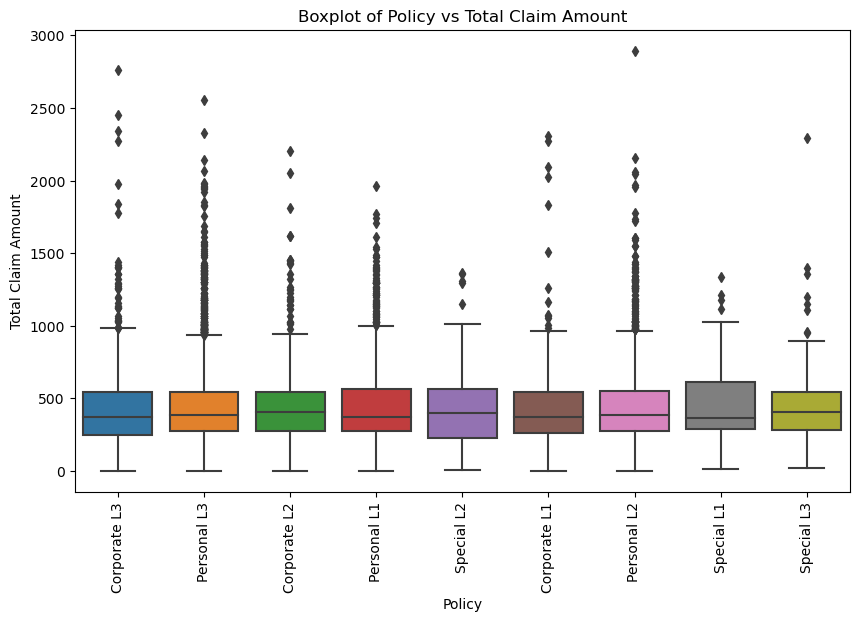

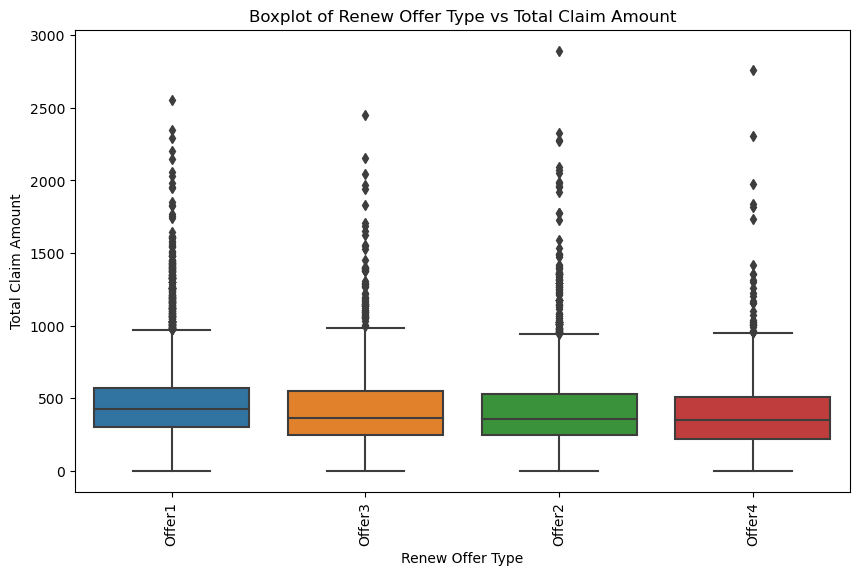

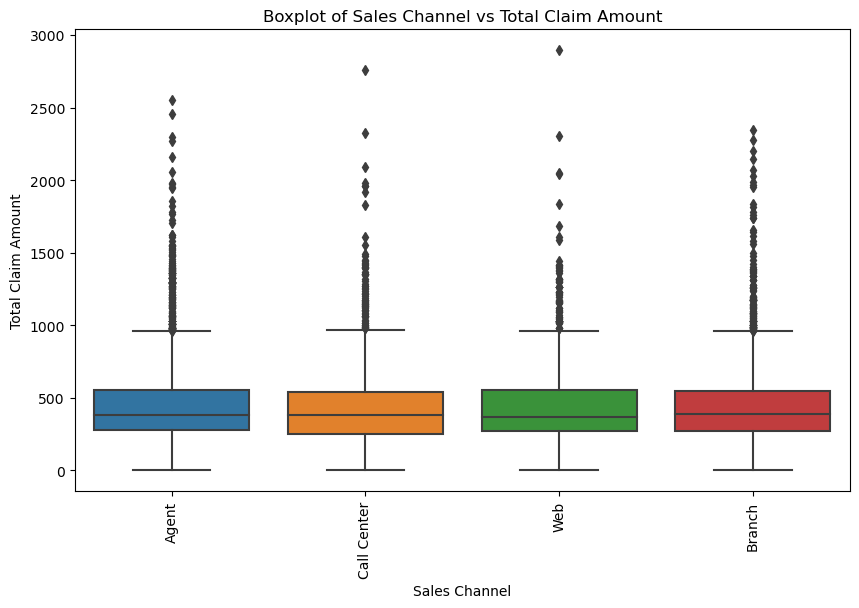

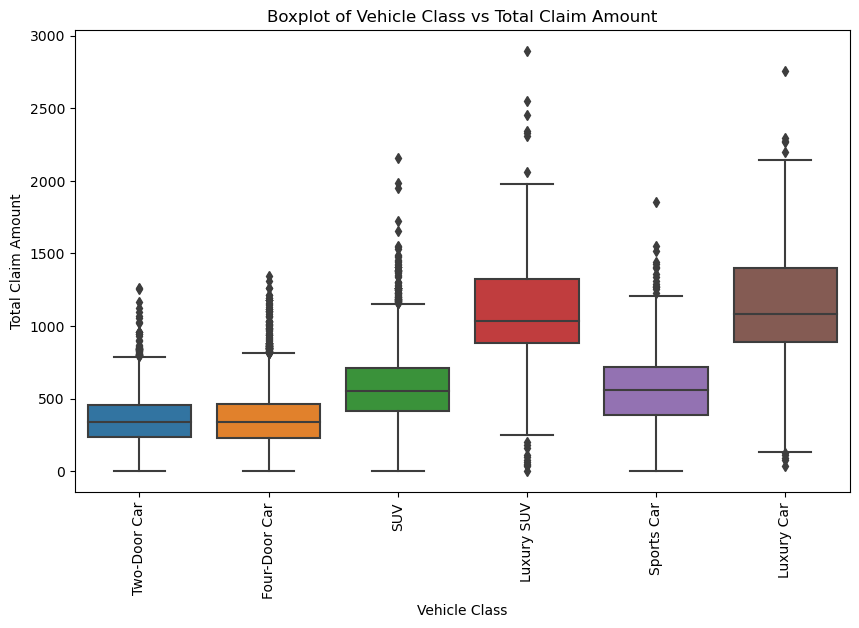

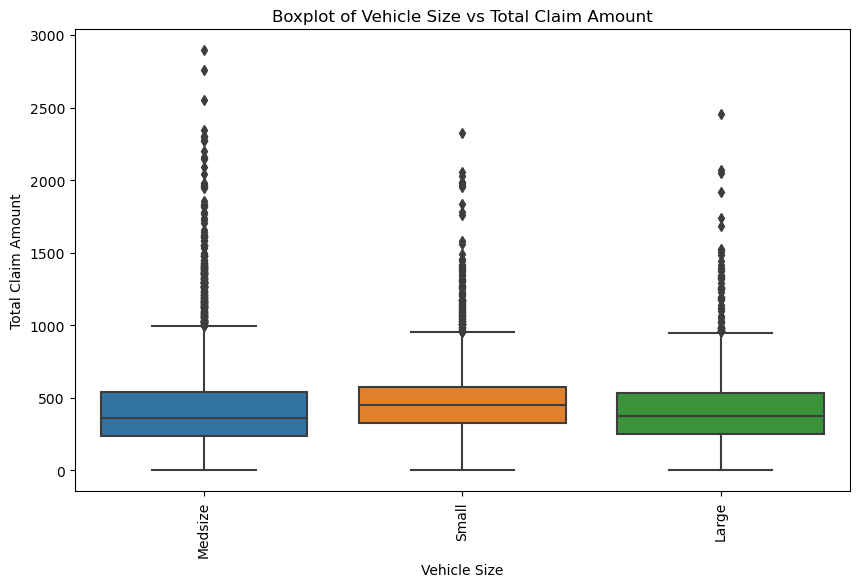

In [4]:
for col in categorical_df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Total Claim Amount', data=customer_df)
    plt.title(f'Boxplot of {col} vs Total Claim Amount')
    plt.xlabel(col)
    plt.ylabel('Total Claim Amount')
    plt.xticks(rotation=90)
    plt.show()


# Lab Feature extraction

In [5]:
categoricals = customer_df.select_dtypes(include='object')
categoricals.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


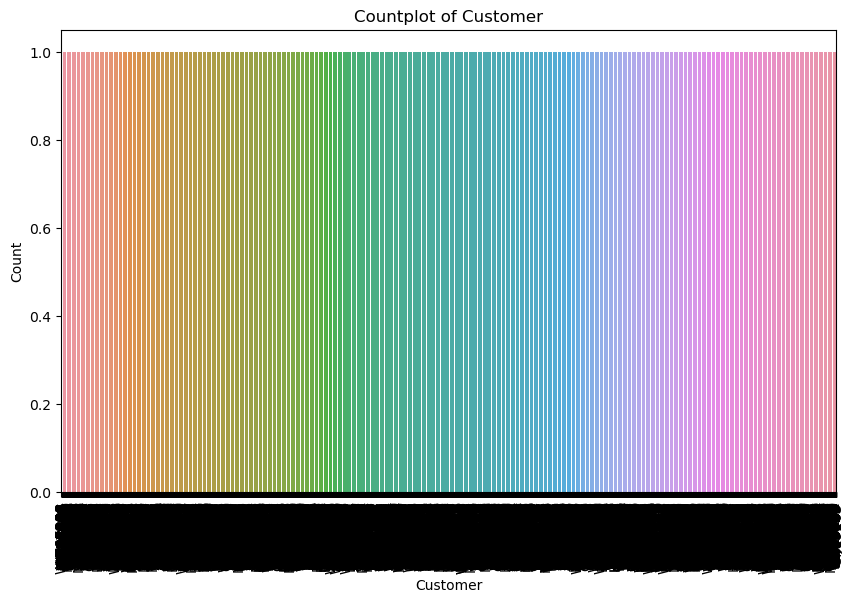

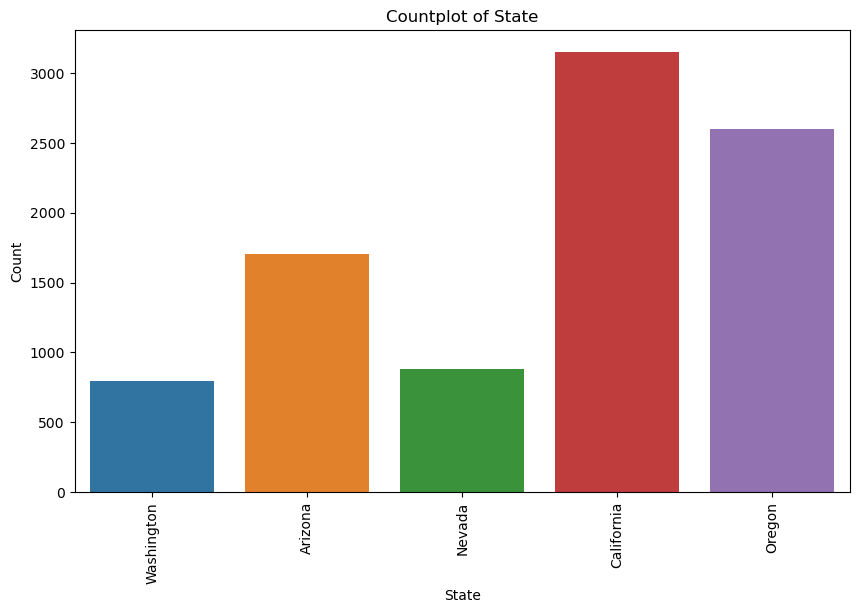

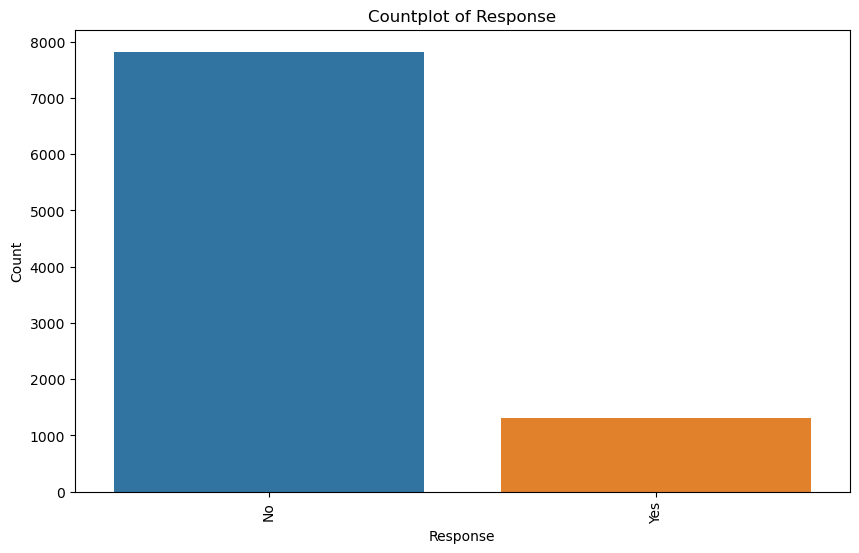

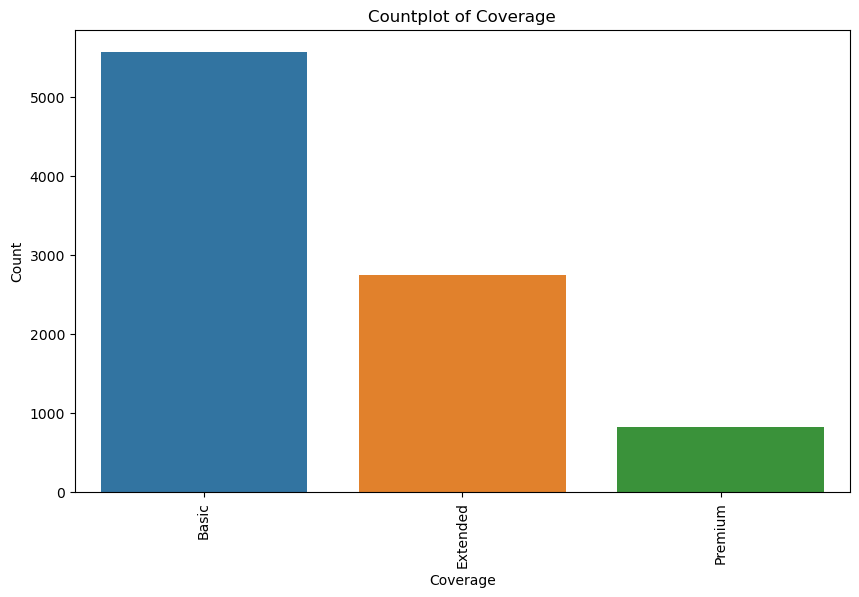

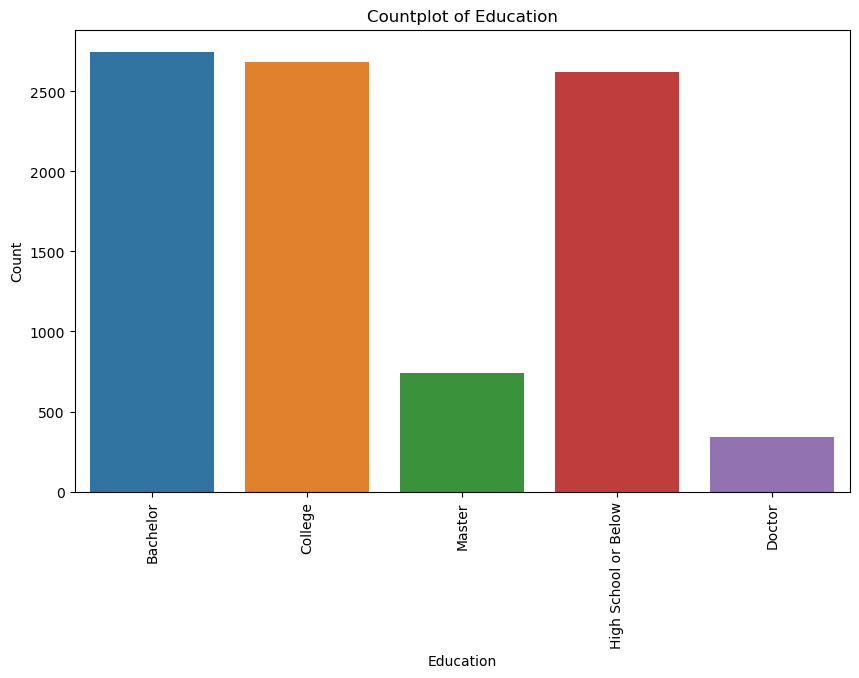

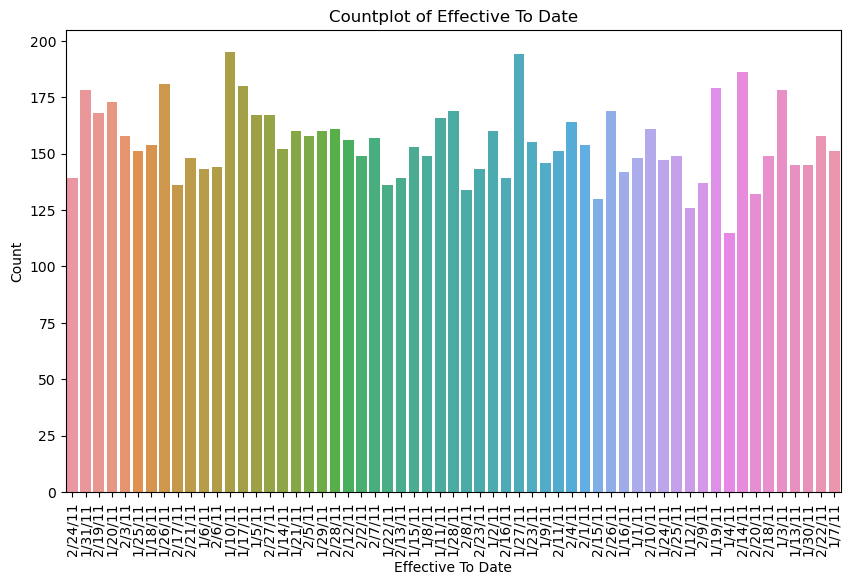

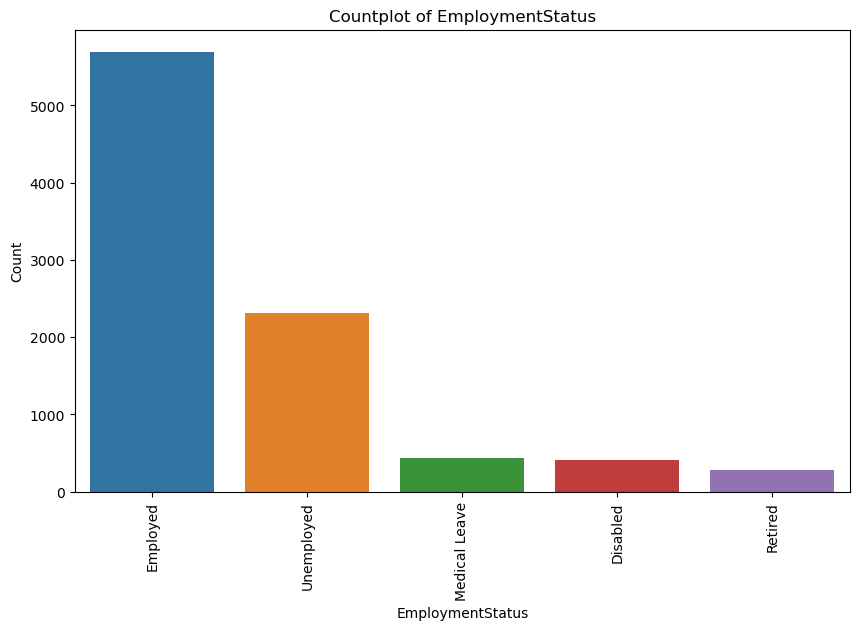

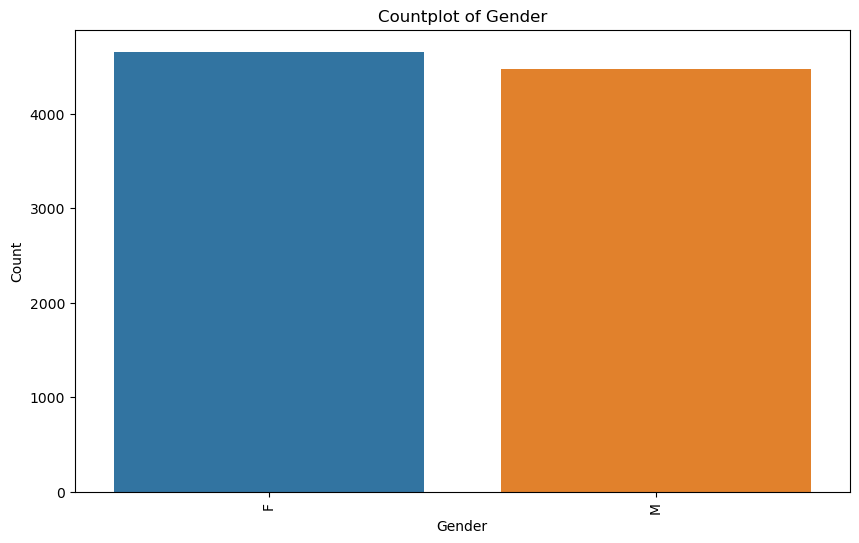

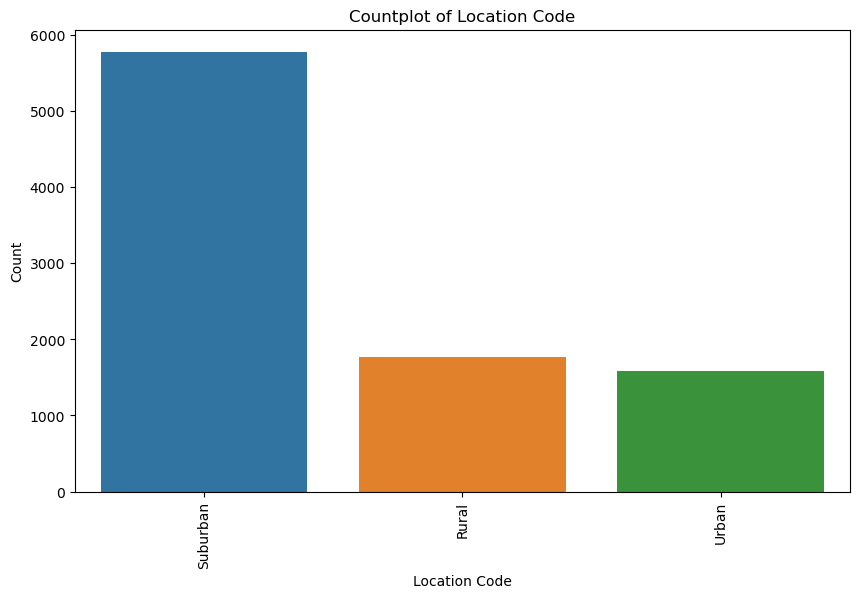

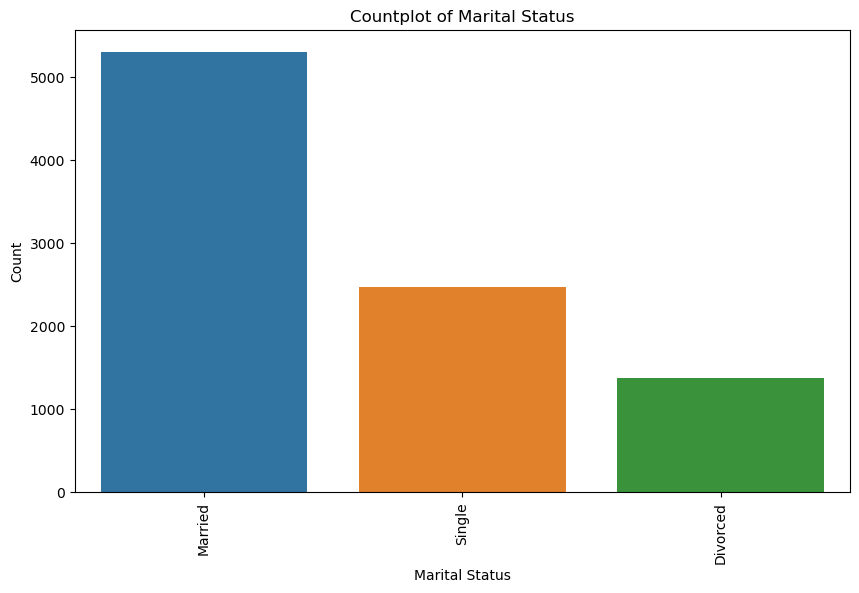

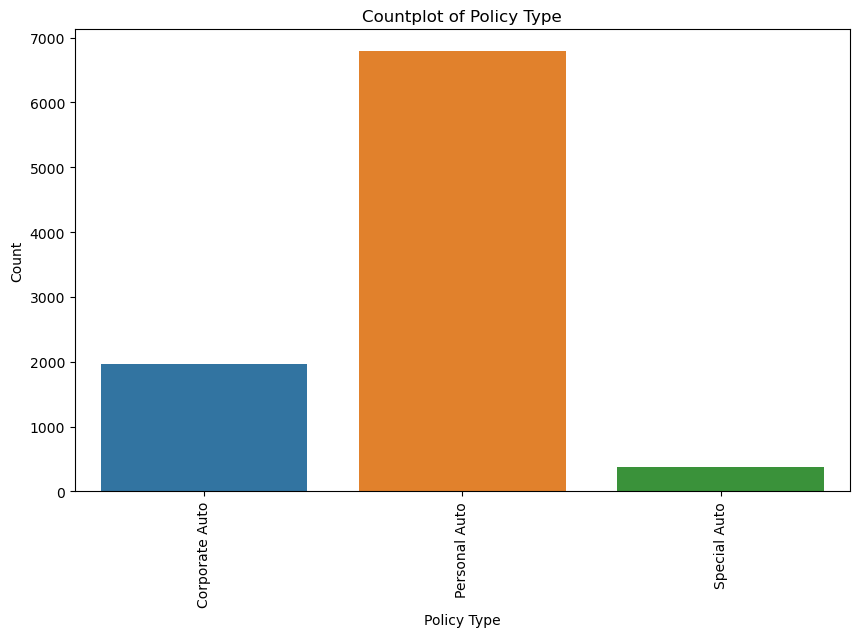

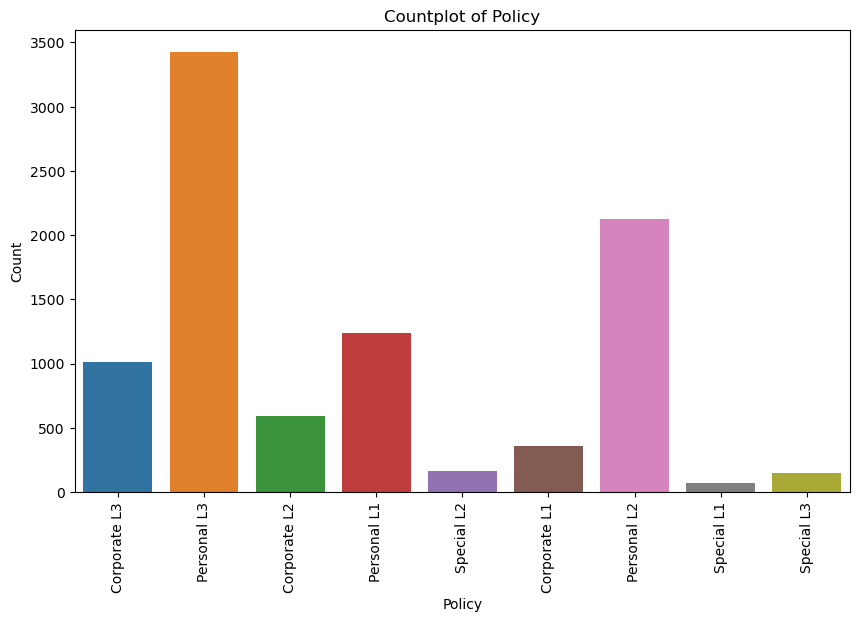

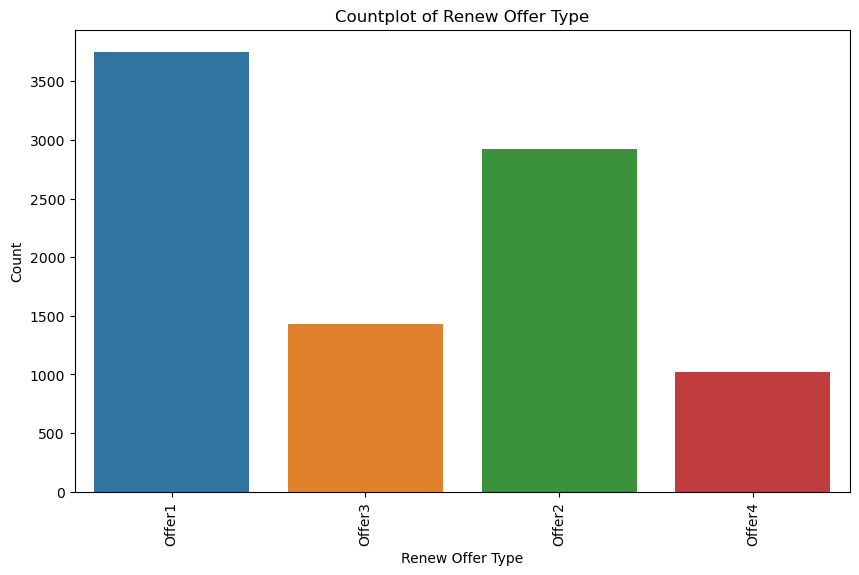

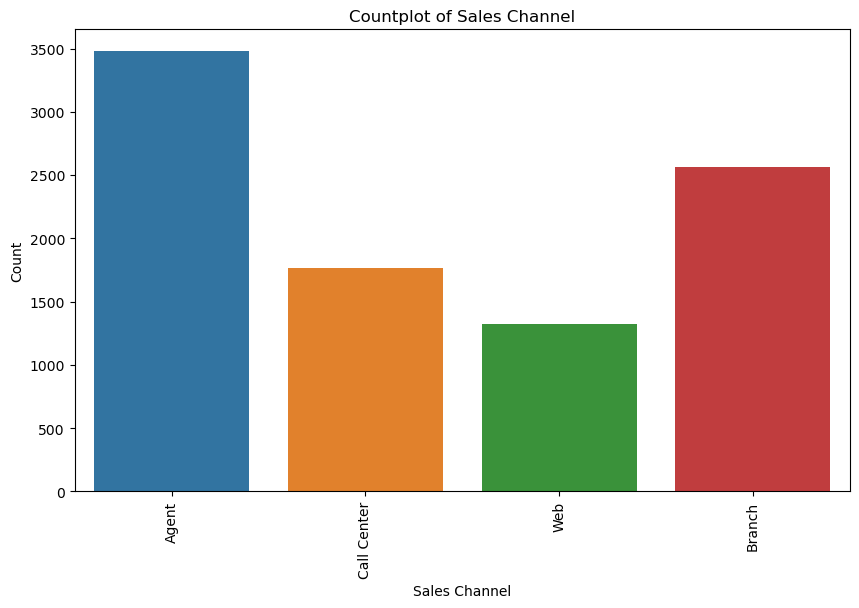

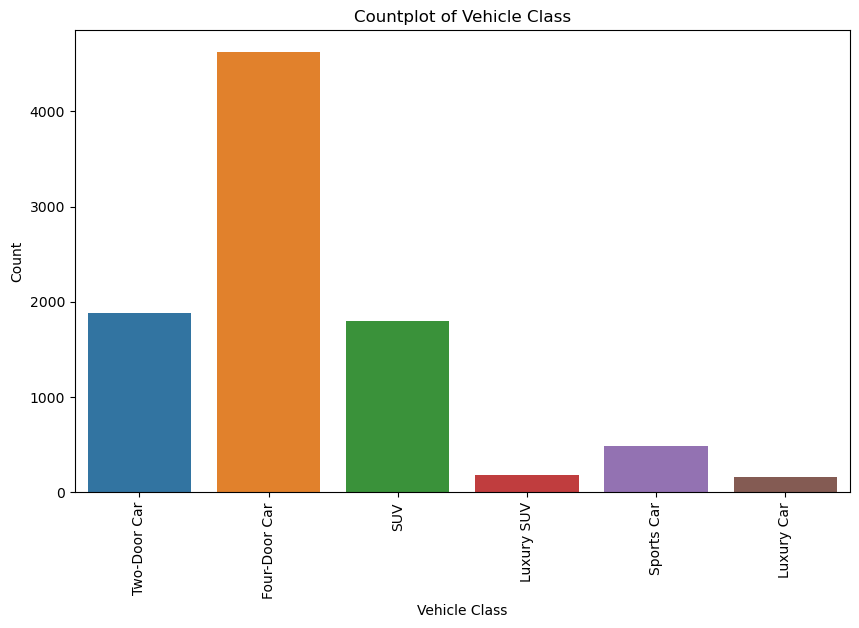

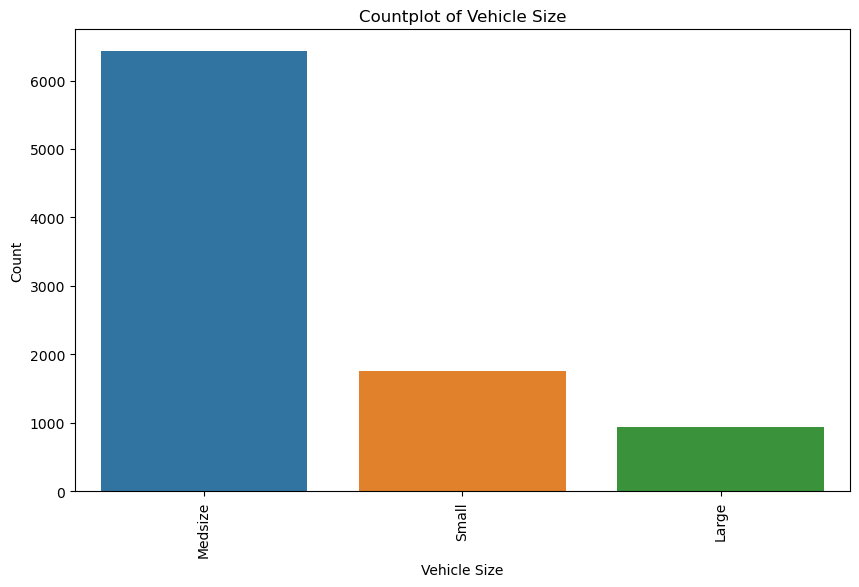

Unique values in Customer:
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64

Unique values in State:
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

Unique values in Response:
No     7826
Yes    1308
Name: Response, dtype: int64

Unique values in Coverage:
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

Unique values in Education:
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

Unique values in Effective To Date:
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1

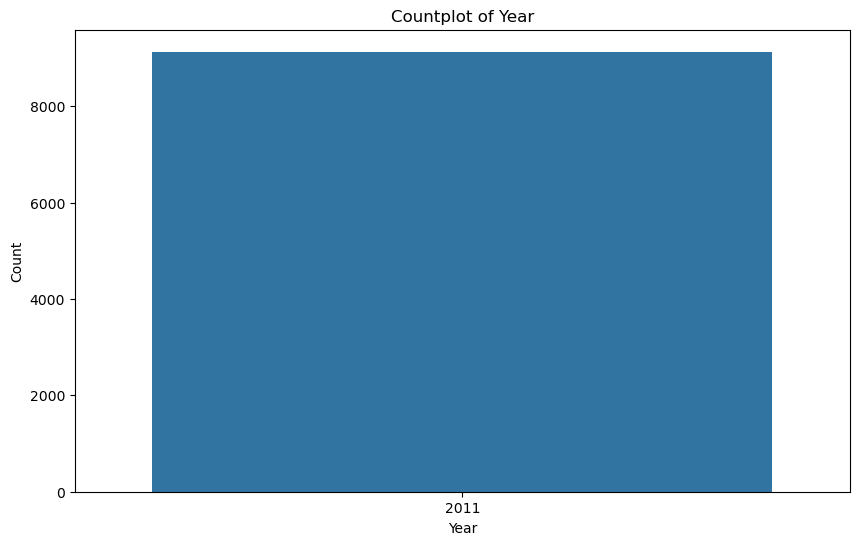

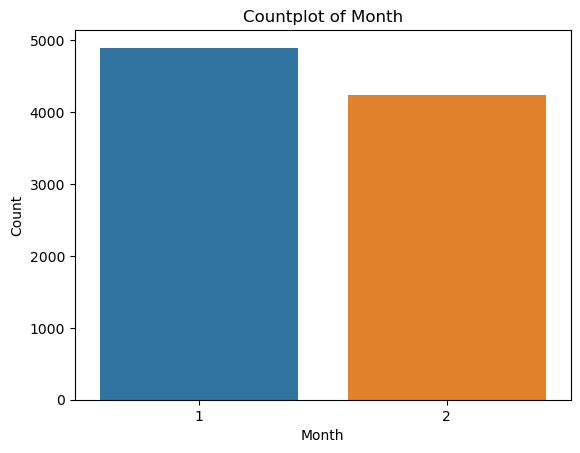

In [6]:
# Plot all the categorical variables
for col in categoricals.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=categoricals)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

# Check for redundant columns
# You can use the value_counts() function to check the unique values in each column
for col in categoricals.columns:
    print(f"Unique values in {col}:\n{categoricals[col].value_counts()}\n")

# Plot the time variable
plt.figure(figsize=(10, 6))
customer_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date'])
customer_df['Year'] = customer_df['Effective To Date'].dt.year
customer_df['Month'] = customer_df['Effective To Date'].dt.month
sns.countplot(x='Year', data=customer_df)
plt.title('Countplot of Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

sns.countplot(x='Month', data=customer_df)
plt.title('Countplot of Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# Data cleaning and wrangling


In [7]:
# Eliminar valores atípicos (Outliers)
def remove_outliers(df, columns, threshold=3):
    for col in columns:
        z_scores = (df[col] - df[col].mean()) / df[col].std()
        df = df[abs(z_scores) < threshold]
    return df

In [8]:
# Aplicar la función para eliminar valores atípicos al dataframe
customer_df_cleaned = remove_outliers(customer_df.copy(), numerical_df.columns)


In [9]:
# Copiar el dataframe para la manipulación de datos
customer_df_processed = customer_df_cleaned.copy()

In [10]:
# Normalizar las variables continuas
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
customer_df_processed[numerical_df.columns] = scaler.fit_transform(customer_df_processed[numerical_df.columns])

In [11]:
# Codificar las variables categóricas
categorical_df_encoded = pd.get_dummies(customer_df_processed[categorical_df.columns], drop_first=True)
customer_df_processed = pd.concat([customer_df_processed[numerical_df.columns], categorical_df_encoded], axis=1)

In [12]:
# Transformar la variable de tiempo
customer_df_processed['Effective To Date'] = pd.to_datetime(customer_df_processed['Effective To Date'])
customer_df_processed['Month'] = customer_df_processed['Effective To Date'].dt.month
customer_df_processed['Day'] = customer_df_processed['Effective To Date'].dt.day
customer_df_processed['Weekday'] = customer_df_processed['Effective To Date'].dt.weekday


In [15]:
# Eliminar columnas redundantes
customer_df_processed.drop(['Effective To Date'], axis=1, inplace=True)



In [16]:


# Guardar el dataframe procesado
customer_df_processed.to_csv('customer_df_processed.csv', index=False)

# Comparing regression models

In [17]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and target variable (y)
X = customer_df_processed.drop('Total Claim Amount', axis=1)
y = customer_df_processed['Total Claim Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a linear regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.008590069567643662


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

def train_test_models(models, X_train, X_test, y_train, y_test):
    for model in models:
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Print the results
        print("Model:", type(model).__name__)
        print("Mean Squared Error:", mse)
        print("R-squared Score:", r2)
        print("----------------------------------")

# Example usage
models = [LinearRegression(), KNeighborsRegressor(), MLPRegressor()]
train_test_models(models, X_train, X_test, y_train, y_test)


Model: LinearRegression
Mean Squared Error: 0.008590069567643662
R-squared Score: 0.7656285337775477
----------------------------------
Model: KNeighborsRegressor
Mean Squared Error: 0.021084399404184814
R-squared Score: 0.42473322667931335
----------------------------------
Model: MLPRegressor
Mean Squared Error: 0.008965040261963573
R-squared Score: 0.7553978329984484
----------------------------------
